In [1]:
# https://deeplearningcourses.com/c/artificial-intelligence-reinforcement-learning-in-python
# https://www.udemy.com/artificial-intelligence-reinforcement-learning-in-python
# https://books.google.ca/books?id=_ATpBwAAQBAJ&lpg=PA201&ots=rinZM8jQ6s&dq=hoeffding%20bound%20gives%20probability%20%22greater%20than%201%22&pg=PA201#v=onepage&q&f=false
import numpy as np
import matplotlib.pyplot as plt
from comparing_epsilons import run_experiment as run_experiment_eps

In [2]:
class Bandit:
  def __init__(self, m):
    self.m = m
    self.mean = 0
    self.N = 0

  def pull(self):
    return np.random.randn() + self.m

  def update(self, x):
    self.N += 1
    self.mean = (1 - 1.0/self.N)*self.mean + 1.0/self.N*x

In [3]:
def ucb(mean, n, nj):
  return mean + np.sqrt(2*np.log(n) / (nj + 1e-2))

In [4]:
def run_experiment(m1, m2, m3, N):
  bandits = [Bandit(m1), Bandit(m2), Bandit(m3)]

  data = np.empty(N)
  
  for i in range(N):
    # optimistic initial values
    j = np.argmax([ucb(b.mean, i+1, b.N) for b in bandits])
    x = bandits[j].pull()
    bandits[j].update(x)

    # for the plot
    data[i] = x
  cumulative_average = np.cumsum(data) / (np.arange(N) + 1)

  # plot moving average ctr
  #plt.figure(figsize=(12,8))
  plt.plot(cumulative_average)
  plt.plot(np.ones(N)*m1)
  plt.plot(np.ones(N)*m2)
  plt.plot(np.ones(N)*m3)
  plt.xscale('log')
  plt.show()

  for b in bandits:
    print (b.mean)

  return cumulative_average

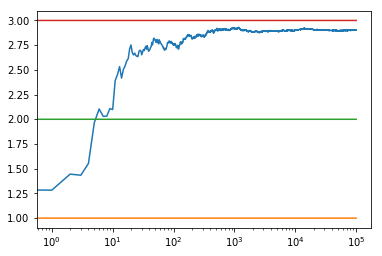

1.0184363440431026
2.009564989059475
3.002028175930452


In [5]:
c_1 = run_experiment_eps(1.0, 2.0, 3.0, 0.1, 100000)

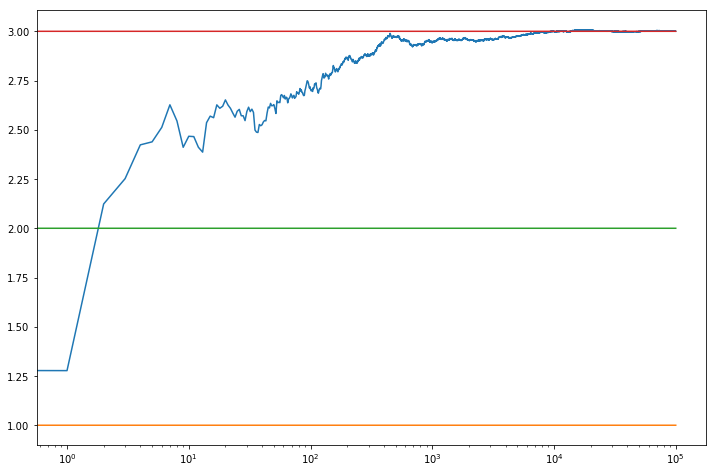

0.6548972294700092
1.996678357421665
3.0010767572817647


In [6]:
oiv = run_experiment(1.0, 2.0, 3.0, 100000)

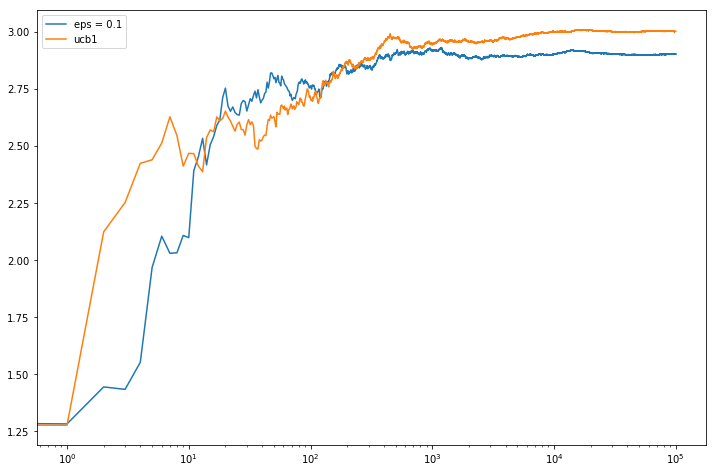

In [7]:
  # log scale plot
  plt.figure(figsize=(12,8))
  plt.plot(c_1, label='eps = 0.1')
  plt.plot(oiv, label='ucb1')
  plt.legend()
  plt.xscale('log')
  plt.show()


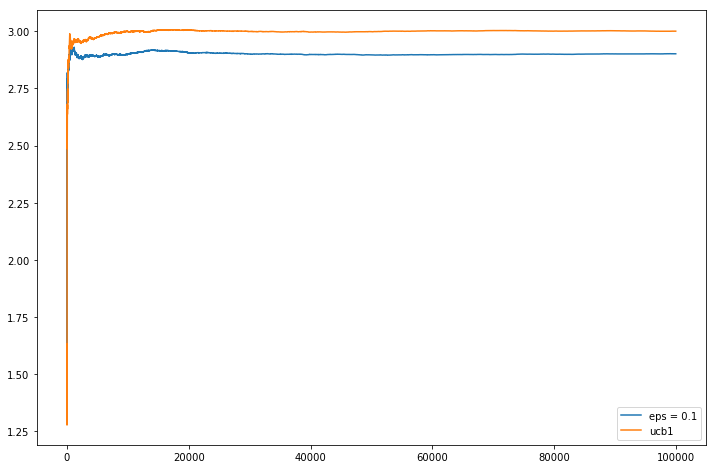

In [8]:
  # linear plot
  plt.figure(figsize=(12,8))
  plt.plot(c_1, label='eps = 0.1')
  plt.plot(oiv, label='ucb1')
  plt.legend()
  plt.show()